<a href="https://colab.research.google.com/github/Kezia1403/DAIOT-lab-/blob/main/NLP_Micro_project_3_sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import ast
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

In [2]:
MAX_WORDS = 10000        # Maximum number of unique words to keep in the vocabulary
MAX_SEQ_LEN = 50         # Maximum length of input sequences (truncate/pad)
EMBEDDING_DIM = 100      # Size of the word embedding vector
LSTM_UNITS = 128         # Number of units in the LSTM layer
DROPOUT_RATE = 0.4       # Dropout rate
BATCH_SIZE = 32
EPOCHS = 10              # Start with a small number, tune later

In [3]:
df = pd.read_csv("emobank_processed_nlp.csv")

In [4]:
df

,id,split,V,A,D,Text,Text_Normalized,Text_Clean,Text_Tokens,Text_Stemmed_Tokens,Text_Final,V_Scaled,A_Scaled
0,110CYL068_1036_1079,train,3.00,3.00,3.20,"Remember what she said in my last letter? ""","remember what she said in my last letter? """,remember what she said in my last letter,"['remember', 'what', 'she', 'said', 'in', 'my'...","['rememb', 'what', 'she', 'said', 'in', 'my', ...",rememb what she said in my last letter,0.529412,0.461538
1,110CYL068_1079_1110,test,2.80,3.10,2.80,If I wasn't working here.,if i wasn't working here.,if i wasnt working here,"['if', 'i', 'wasnt', 'working', 'here']","['if', 'i', 'wasnt', 'work', 'here']",if i wasnt work here,0.470588,0.500000
2,110CYL068_1127_1130,train,3.00,3.00,3.00,"..""","..""",NaN,[],[],NaN,0.529412,0.461538
3,110CYL068_1137_1188,train,3.44,3.00,3.22,Goodwill helps people get off of public assist...,goodwill helps people get off of public assist...,goodwill helps people get off of public assist...,"['goodwill', 'helps', 'people', 'get', 'off', ...","['goodwil', 'help', 'peopl', 'get', 'off', 'of...",goodwil help peopl get off of public assist,0.658824,0.461538
4,110CYL068_1189_1328,train,3.55,3.27,3.46,Sherry learned through our Future Works class ...,sherry learned through our future works class ...,sherry learned through our future works class ...,"['sherry', 'learned', 'through', 'our', 'futur...","['sherri', 'learn', 'through', 'our', 'futur',...",sherri learn through our futur work class that...,0.691176,0.565385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10057,wwf12_4531_4624,train,3.00,3.50,3.00,Please let it be a constant reminder of all yo...,please let it be a constant reminder of all yo...,please let it be a constant reminder of all yo...,"['please', 'let', 'it', 'be', 'a', 'constant',...","['pleas', 'let', 'it', 'be', 'a', 'constant', ...",pleas let it be a constant remind of all your ...,0.529412,0.653846
10058,wwf12_501_591,train,3.80,3.40,3.60,That’s why I want to extend my appreciation fo...,that’s why i want to extend my appreciation fo...,thats why i want to extend my appreciation for...,"['thats', 'why', 'i', 'want', 'to', 'extend', ...","['that', 'whi', 'i', 'want', 'to', 'extend', '...",that whi i want to extend my appreci for your ...,0.764706,0.615385
10059,wwf12_592_691,train,3.00,3.00,3.10,And why I’m writing you today to ask you to re...,and why i’m writing you today to ask you to re...,and why im writing you today to ask you to ren...,"['and', 'why', 'im', 'writing', 'you', 'today'...","['and', 'whi', 'im', 'write', 'you', 'today', ...",and whi im write you today to ask you to renew...,0.529412,0.461538
10060,wwf12_702_921,train,3.33,3.44,3.44,"In fact, I want to urge you to strengthen your...","in fact, i want to urge you to strengthen your...",in fact i want to urge you to strengthen your ...,"['in', 'fact', 'i', 'want', 'to', 'urge', 'you...","['in', 'fact', 'i', 'want', 'to', 'urg', 'you'...",in fact i want to urg you to strengthen your d...,0.626471,0.630769


In [5]:
df['Text_Tokens_List'] = df['Text_Tokens'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

In [6]:
df['Text_Tokens_List']

,Text_Tokens_List
0,"[remember, what, she, said, in, my, last, letter]"
1,"[if, i, wasnt, working, here]"
2,[]
3,"[goodwill, helps, people, get, off, of, public..."
4,"[sherry, learned, through, our, future, works,..."
...,...
10057,"[please, let, it, be, a, constant, reminder, o..."
10058,"[thats, why, i, want, to, extend, my, apprecia..."
10059,"[and, why, im, writing, you, today, to, ask, y..."
10060,"[in, fact, i, want, to, urge, you, to, strengt..."


In [7]:
X_data = df['Text_Tokens_List']
Y_data = df[['V_Scaled', 'A_Scaled']].values

In [8]:
X_train = X_data[df['split'] == 'train']
Y_train = Y_data[df['split'] == 'train']

In [9]:
X_val = X_data[df['split'] == 'dev']
Y_val = Y_data[df['split'] == 'dev']

In [10]:
X_test = X_data[df['split'] == 'test']
Y_test = Y_data[df['split'] == 'test']

In [11]:
X_data
Y_data

array([[0.52941176, 0.46153846],
       [0.47058824, 0.5       ],
       [0.52941176, 0.46153846],
       ...,
       [0.52941176, 0.46153846],
       [0.62647059, 0.63076923],
       [0.65588235, 0.73461538]])

In [12]:
X_train
Y_train


array([[0.52941176, 0.46153846],
       [0.52941176, 0.46153846],
       [0.65882353, 0.46153846],
       ...,
       [0.52941176, 0.46153846],
       [0.62647059, 0.63076923],
       [0.65588235, 0.73461538]])

In [13]:
X_val
Y_val

array([[0.60294118, 0.41538462],
       [0.73529412, 0.5       ],
       [0.52941176, 0.31538462],
       ...,
       [0.60294118, 0.41538462],
       [0.44411765, 0.46153846],
       [0.52941176, 0.07692308]])

In [14]:
X_test
Y_test

array([[0.47058824, 0.5       ],
       [0.60882353, 0.6       ],
       [0.48823529, 0.57307692],
       ...,
       [0.43235294, 0.50384615],
       [0.4       , 0.54615385],
       [0.61764706, 0.53846154]])

In [15]:
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.apply(lambda x: ' '.join(x)))

In [16]:
tokenizer

In [50]:
def encode_and_pad(texts):
    sequences = tokenizer.texts_to_sequences(texts.apply(lambda x: ' '.join(x)))
    padded = pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')
    return padded

In [18]:
X_train_padded = encode_and_pad(X_train)
X_val_padded = encode_and_pad(X_val)
X_test_padded = encode_and_pad(X_test)

In [19]:
X_train_padded
X_val_padded
X_test_padded

array([[  58,   10,  479, ...,    0,    0,    0],
       [ 407,  233,   41, ...,    0,    0,    0],
       [  19,   43,   52, ...,    0,    0,    0],
       ...,
       [2796,    1,    6, ...,    0,    0,    0],
       [   2, 2416,   27, ...,    0,    0,    0],
       [ 219,  217,  162, ...,    0,    0,    0]], dtype=int32)

In [20]:
VOCAB_SIZE = len(tokenizer.word_index) + 1

In [21]:
print(f"Vocabulary Size: {VOCAB_SIZE}")

Vocabulary Size: 15299


In [22]:
print(f"Training Input Shape: {X_train_padded.shape}")

Training Input Shape: (8062, 50)


In [23]:
print(f"Training Target Shape: {Y_train.shape}")

Training Target Shape: (8062, 2)


In [24]:
def build_emotion_regression_model(vocab_size, embedding_dim, lstm_units, max_seq_len, dropout_rate):
    model = Sequential([

        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            input_length=max_seq_len,
            mask_zero=True
        ),
        Dropout(dropout_rate),


        Bidirectional(LSTM(lstm_units, return_sequences=False)),
        Dropout(dropout_rate),


        Dense(2, activation='sigmoid') # Changed from 1 to 2 units
    ])

    return model

model = build_emotion_regression_model(
    VOCAB_SIZE, EMBEDDING_DIM, LSTM_UNITS, MAX_SEQ_LEN, DROPOUT_RATE
)


model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

print("\nModel Summary:")
model.summary()


Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
import tensorflow.keras.backend as K

def ccc_loss(y_true, y_pred):

    mu_true = K.mean(y_true, axis=0)
    mu_pred = K.mean(y_pred, axis=0)


    var_true = K.var(y_true, axis=0)
    var_pred = K.var(y_pred, axis=0)


    mu_true_exp = K.expand_dims(mu_true, axis=0)
    mu_pred_exp = K.expand_dims(mu_pred, axis=0)

    sigma_xy = K.mean((y_true - mu_true_exp) * (y_pred - mu_pred_exp), axis=0)


    numerator = 2. * sigma_xy
    denominator = var_true + var_pred + K.square(mu_true - mu_pred)

    ccc = numerator / (denominator + K.epsilon())


    return K.mean(1.0 - ccc)


model.compile(
    optimizer='adam',
    loss=ccc_loss,
    metrics=['mae', 'mse']
)

In [26]:
model.build(input_shape=(None, 100))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,529,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,764,910 (6.73 MB)

 Trainable params: 1,764,910 (6.73 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model = build_emotion_regression_model(
    VOCAB_SIZE, EMBEDDING_DIM, LSTM_UNITS, MAX_SEQ_LEN, DROPOUT_RATE
)

model.compile(
    optimizer='adam',
    loss=ccc_loss,
    metrics=['mae', 'mse']
)

print("\nStarting Model Training...")
history = model.fit(
    X_train_padded, Y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_padded, Y_val),
    verbose=1
)

print("\nModel training complete.")


Starting Model Training...
Epoch 1/10
 95/252 ━━━━━━━━━━━━━━━━━━━━ 25s 163ms/step - loss: 0.9874 - mae: 0.0801 - mse: 0.0114

KeyboardInterrupt: 

In [ ]:
print("\n--- Training History Summary ---")


--- Training History Summary ---


In [ ]:

print("\n--- Training History Summary ---")
final_epoch = len(history.history['loss'])
print(f"Total Epochs Run: {final_epoch}")
print(f"Final Training Loss (MSE): {history.history['loss'][-1]:.4f}")
print(f"Final Training MAE: {history.history['mae'][-1]:.4f}")
print(f"Final Validation Loss (MSE): {history.history['val_loss'][-1]:.4f}")
print(f"Final Validation MAE: {history.history['val_mae'][-1]:.4f}")


--- Training History Summary ---
Total Epochs Run: 10
Final Training Loss (MSE): 0.1224
Final Training MAE: 0.0351
Final Validation Loss (MSE): 0.6915
Final Validation MAE: 0.0784


In [ ]:


print("\n--- 2. Final Evaluation on Unseen Test Set ---")

test_results = model.evaluate(
    X_test_padded,
    Y_test,
    batch_size=BATCH_SIZE,
    verbose=0
)

print(f"Test Loss (MSE): {test_results[0]:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_results[1]:.4f}")
print(f"Test Mean Squared Error (MSE): {test_results[2]:.4f}")


--- 2. Final Evaluation on Unseen Test Set ---
Test Loss (MSE): 0.6833
Test Mean Absolute Error (MAE): 0.0778
Test Mean Squared Error (MSE): 0.0103


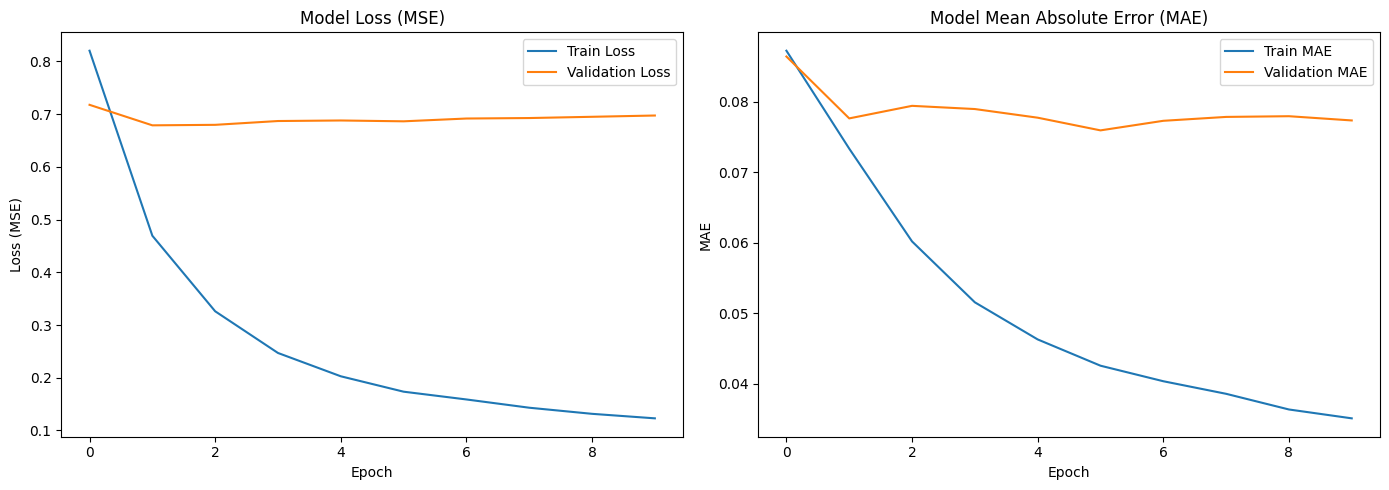

In [30]:
import matplotlib.pyplot as plt



def plot_history(history):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss (MSE)')
    ax1.set_ylabel('Loss (MSE)')
    ax1.set_xlabel('Epoch')
    ax1.legend()


    ax2.plot(history.history['mae'], label='Train MAE')
    ax2.plot(history.history['val_mae'], label='Validation MAE')
    ax2.set_title('Model Mean Absolute Error (MAE)')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    plt.tight_layout()
    plt.show()


plot_history(history)

In [ ]:
model.save('emotion_regression_model.keras')

In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
new_text = ["I am so happy to be working on this project!"]

In [ ]:
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')

In [ ]:
final_prediction = model.predict(new_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


In [ ]:
v_score = final_prediction[0][0]
a_score = final_prediction[0][1]
print(f"\nNew Prediction for: '{new_text[0]}'")
print(f"Predicted Valence (0-1): {v_score:.4f}")
print(f"Predicted Arousal (0-1): {a_score:.4f}")


New Prediction for: 'I am so happy to be working on this project!'
Predicted Valence (0-1): 0.6768
Predicted Arousal (0-1): 0.5796


In [29]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

print("\n--- 1. Re-Compiling Model with CCC Loss ---")
model.compile(
    optimizer='adam',

    loss=ccc_loss,
    metrics=['mae', 'mse']
)
print("Model re-compiled with CCC Loss.")

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)



print("\n--- 3. Re-Starting Training with Early Stopping and CCC Loss ---")
NEW_EPOCHS = 100
BATCH_SIZE = 32

history_improved = model.fit(
    X_train_padded, Y_train,
    epochs=NEW_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_padded, Y_val),
    callbacks=[early_stopping],
    verbose=1
)

print("\nModel re-training complete (stopped by Early Stopping or finished all epochs).")


print("\n--- 4. Final Evaluation on UNSEEN Test Set (Best Weights Used) ---")
test_results = model.evaluate(
    X_test_padded,
    Y_test,
    batch_size=BATCH_SIZE,
    verbose=0
)

print(f"Final Test Loss (CCC Loss): {test_results[0]:.4f}")
print(f"Final Test Mean Absolute Error (MAE): {test_results[1]:.4f}")
print(f"Final Test Mean Squared Error (MSE): {test_results[2]:.4f}")


--- 1. Re-Compiling Model with CCC Loss ---
Model re-compiled with CCC Loss.

--- 3. Re-Starting Training with Early Stopping and CCC Loss ---
Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - loss: 0.7169 - mae: 0.0862 - mse: 0.0129 - val_loss: 0.6923 - val_mae: 0.0863 - val_mse: 0.0122
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 79s 165ms/step - loss: 0.4149 - mae: 0.0680 - mse: 0.0080 - val_loss: 0.6642 - val_mae: 0.0790 - val_mse: 0.0103
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - loss: 0.2993 - mae: 0.0571 - mse: 0.0057 - val_loss: 0.6695 - val_mae: 0.0786 - val_mse: 0.0103
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - loss: 0.2228 - mae: 0.0493 - mse: 0.0044 - val_loss: 0.6632 - val_mae: 0.0799 - val_mse: 0.0105
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - loss: 0.1840 - mae: 0.0449 - mse: 0.0037 - val_loss: 0.6779 - val_mae: 0.0788 - val_mse: 0.0103
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - loss: 0.1712 - mae: 0.0422 -

In [31]:

model.save('best_emotion_model.keras')
print("Model saved as 'best_emotion_model.keras'")

Model saved as 'best_emotion_model.keras'


In [32]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Tokenizer saved as 'tokenizer.pickle'")

Tokenizer saved as 'tokenizer.pickle'


In [33]:
loaded_model = tf.keras.models.load_model(
    'best_emotion_model.keras',
    custom_objects={'ccc_loss': ccc_loss}
)

In [34]:
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [36]:
new_text = ["I am completely devastated by the news."]
MAX_SEQ_LEN = 50

In [38]:
new_sequences = loaded_tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')

In [39]:
final_prediction = loaded_model.predict(new_padded)

v_score = final_prediction[0][0]
a_score = final_prediction[0][1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


In [40]:
print(f"\nPrediction for: '{new_text[0]}'")
print(f"Predicted Valence (0-1, 1=Positive): {v_score:.4f}")
print(f"Predicted Arousal (0-1, 1=Excited): {a_score:.4f}")


Prediction for: 'I am completely devastated by the news.'
Predicted Valence (0-1, 1=Positive): 0.5330
Predicted Arousal (0-1, 1=Excited): 0.4363


In [41]:
import pickle
import tensorflow as tf
import os

In [42]:
def ccc_loss(y_true, y_pred):
    import tensorflow.keras.backend as K
    mu_true = K.mean(y_true, axis=0)
    mu_pred = K.mean(y_pred, axis=0)
    var_true = K.var(y_true, axis=0)
    var_pred = K.var(y_pred, axis=0)
    mu_true_exp = K.expand_dims(mu_true, axis=0)
    mu_pred_exp = K.expand_dims(mu_pred, axis=0)
    sigma_xy = K.mean((y_true - mu_true_exp) * (y_pred - mu_pred_exp), axis=0)
    numerator = 2. * sigma_xy
    denominator = var_true + var_pred + K.square(mu_true - mu_pred)
    ccc = numerator / (denominator + K.epsilon())
    return K.mean(1.0 - ccc)


MODEL_FILENAME = 'best_emotion_model.keras'
TOKENIZER_FILENAME = 'tokenizer.pickle'

In [63]:
try:
    # Save the model architecture, weights, and training configuration.
    # We use custom_objects to ensure the custom loss is saved correctly.
    # NOTE: If using Keras 3 and an internal TensorFlow Keras backend, Keras often handles custom losses automatically.
    # However, passing it explicitly is safest for deployment.
    tf.keras.models.save_model(
        model,
        MODEL_FILENAME,
        overwrite=True,
        custom_objects={'ccc_loss': ccc_loss}
    )
    print(f"✅ Model saved successfully as '{MODEL_FILENAME}'")
    print(f"File size: {os.path.getsize(MODEL_FILENAME) / (1024*1024):.2f} MB")
except Exception as e:
    print(f"Error saving model: {e}")

Error saving model: The following argument(s) are not supported: ['custom_objects']


In [64]:
try:
    # Save the Python tokenizer object using pickle.
    # This contains the vocabulary necessary for preprocessing new input text.
    with open(TOKENIZER_FILENAME, 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print(f"Tokenizer saved successfully as '{TOKENIZER_FILENAME}'")
    print(f"File size: {os.path.getsize(TOKENIZER_FILENAME) / 1024:.2f} KB")
except Exception as e:
    print(f" Error saving tokenizer: {e}")

Tokenizer saved successfully as 'tokenizer.pickle'
File size: 599.36 KB


In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming:
# sequences: is the list of tokenized text sequences (the first argument)
# MAX_SEQ_LEN: is set to 50

# --- CORRECT CODE ---
# All arguments after the first positional one ('sequences') MUST be named (keyword arguments).

padded_sequences = pad_sequences(
    sequences,
    maxlen=MAX_SEQ_LEN,
    padding='post',     # Correctly named argument
    truncating='post'   # Correctly named argument
)

NameError: name 'sequences' is not defined

In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

MAX_SEQ_LEN = 50
NEW_TEXT = ["I am so excited to see the final results of the model!"]

try:
    with open('tokenizer.pickle', 'rb') as handle:

        loaded_tokenizer = pickle.load(handle)
except FileNotFoundError:
    print("Error: 'tokenizer.pickle' not found. Ensure it is in the current directory.")

    loaded_tokenizer = None


if loaded_tokenizer:
    print(f"Text to preprocess: {NEW_TEXT[0]}")
    sequences = loaded_tokenizer.texts_to_sequences(NEW_TEXT)

    print(f"Generated Sequences (first 10 IDs): {sequences[0][:10]}...")

    padded_input = pad_sequences(
        sequences,
        maxlen=MAX_SEQ_LEN,
        padding='post',
        truncating='post'
    )

    print(f"Padded Input Shape: {padded_input.shape}")
    print("Preprocessing complete. The 'padded_input' variable is now ready for model.predict()")



Text to preprocess: I am so excited to see the final results of the model!
Generated Sequences (first 10 IDs): [10, 174, 53, 4777, 3, 78, 2, 1411, 701, 4]...
Padded Input Shape: (1, 50)
Preprocessing complete. The 'padded_input' variable is now ready for model.predict()


In [54]:
sequences = loaded_tokenizer.texts_to_sequences(NEW_TEXT)

In [62]:
import tensorflow as tf
import numpy as np
import os


def ccc_loss(y_true, y_pred):
    import tensorflow.keras.backend as K
    mu_true = K.mean(y_true, axis=0)
    mu_pred = K.mean(y_pred, axis=0)
    var_true = K.var(y_true, axis=0)
    var_pred = K.var(y_pred, axis=0)
    mu_true_exp = K.expand_dims(mu_true, axis=0)
    mu_pred_exp = K.expand_dims(mu_pred, axis=0)
    sigma_xy = K.mean((y_true - mu_true_exp) * (y_pred - mu_pred_exp), axis=0)
    numerator = 2. * sigma_xy
    denominator = var_true + var_pred + K.square(mu_true - mu_pred)
    ccc = numerator / (denominator + K.epsilon())
    return K.mean(1.0 - ccc)

MODEL_FILENAME = 'best_emotion_model.keras'


print("\n--- 1. Loading Final Model ---")
try:
    loaded_model = tf.keras.models.load_model(
        MODEL_FILENAME,
        custom_objects={'ccc_loss': ccc_loss}
    )
    print(f"Model '{MODEL_FILENAME}' loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")



if 'padded_input' in locals() and loaded_model:
    print("\n--- 2. Running Inference ---")

    raw_prediction = loaded_model.predict(padded_input, verbose=0)


    v_score = raw_prediction[0][0]
    a_score = raw_prediction[0][1]


    print("\n--- 3. FINAL EMOTION PREDICTION ---")
    print(f"Input Text: {NEW_TEXT[0]}")
    print("----------------------------------")
    print(f"Predicted Valence (0-1, 1=Positive): {v_score:.4f}")
    print(f"Predicted Arousal (0-1, 1=Excited): {a_score:.4f}")
    print("----------------------------------")

    print("\n End-to-end prediction successful. The backend process is verified.")
else:
    print("Cannot proceed: 'padded_input' was not defined or model failed to load.")


--- 1. Loading Final Model ---
Model 'best_emotion_model.keras' loaded successfully.

--- 2. Running Inference ---

--- 3. FINAL EMOTION PREDICTION ---
Input Text: I am so excited to see the final results of the model!
----------------------------------
Predicted Valence (0-1, 1=Positive): 0.7162
Predicted Arousal (0-1, 1=Excited): 0.6775
----------------------------------

 End-to-end prediction successful. The backend process is verified.


In [66]:
import tensorflow as tf
import keras

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

TensorFlow Version: 2.19.0
Keras Version: 3.10.0
